# EM analysis Experimenting

#### Run this at the beginning of every notebook

In [1]:
%load_ext autoreload
%autoreload 2

#### importing data and reading in CSV 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/chimi_clean_contingencies_only_parsed_data.csv')

#### pulling out only the first epoch of the first day, plus other experimenting code

In [3]:
#df.index = #RangeIndex(start=0, stop=10115, step=1)
#df.columns =Index([u'Unnamed: 0', u'leaf', u'stem', u'reward', u'contingency', u'date',
       #u'session', u'trial'],
     # dtype='object')
#df.columns[1] = leaf
# df.dtypes
# Unnamed: 0      int64
# leaf            int64
# stem           object
# reward          int64
# contingency     int64
# date            int64
# session         int64
# trial           int64
# dtype: object
firstday_firstsesh = df[(df['session'] == 1) & (df['date'] == 20200213)]
#first
firstday_firstsesh 
         # ->>> Uncomment above if you wanna see table
#okay so i finally figured out how to index and pull out only rows where col = specific things. 
#Made a plot of leaves visited but need to figure out how to add axis titles/beautify. 

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0,4,B,1,805020802050,20200213,1,0
1,1,3,B,1,805020802050,20200213,1,1
2,2,1,A,1,805020802050,20200213,1,2
3,3,2,A,0,805020802050,20200213,1,3
4,4,1,A,1,805020802050,20200213,1,4
...,...,...,...,...,...,...,...,...
275,275,4,B,1,205080508020,20200213,1,275
276,276,3,B,0,205080508020,20200213,1,276
277,277,4,B,0,205080508020,20200213,1,277
278,278,3,B,1,205080508020,20200213,1,278


## Plotting!

Text(0, 0.5, 'leaf visited')

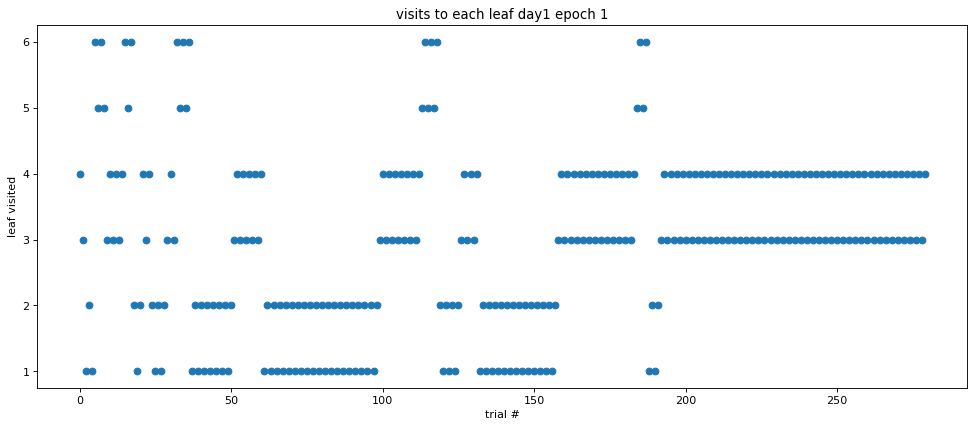

In [4]:
figure(figsize=(15, 6), dpi=80)
plt.scatter(firstday_firstsesh[firstday_firstsesh.columns[0]], firstday_firstsesh[firstday_firstsesh.columns[1]])
plt.title("visits to each leaf day1 epoch 1")
plt.xlabel("trial #")
plt.ylabel("leaf visited")

In [5]:
# This cell will plot 2 things on top of eachother, plots a different way with ax
#figure, ax1 = plt.subplots() 
# ax1.plot(df[df.columns[0]],df[df.columns[1]],linewidth=0.5,zorder=1,label="Force1")
# #ax1.plot(df[df.columns[0]],df[df.columns[2]],linewidth=0.5,zorder=1, label = "Force2")

In [6]:
#This cell will currently plot all stems visited on every day, every epoch with X's
#plt.scatter(df[df.columns[0]], df[df.columns[1]], linewidth=.5, marker = "x" )

### Finding how many trials spent at each stem 

In [7]:
num_trials_A = firstday_firstsesh [(firstday_firstsesh['stem'] == 'A')]
num_trials_B = firstday_firstsesh [(firstday_firstsesh['stem'] == 'B')]
num_trials_C = firstday_firstsesh [(firstday_firstsesh['stem'] == 'C')]
A = len(num_trials_A)
B = len(num_trials_B)
C = len(num_trials_C)
print(A + B + C)

280


Text(0, 0.5, 'num visits')

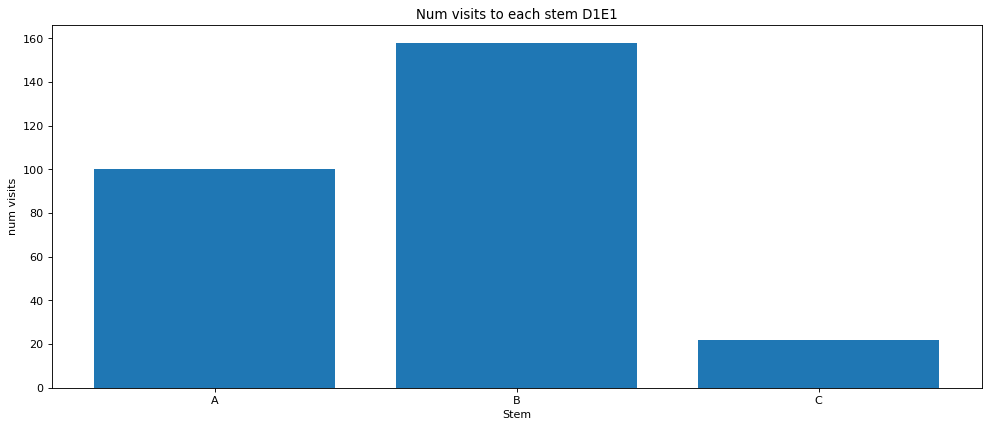

In [8]:
figure(figsize=(15, 6), dpi=80)
stems = ['A', 'B', 'C']
visits = [A, B, C]
plt.bar(stems, visits)
plt.title('Num visits to each stem D1E1')
plt.xlabel('Stem')
plt.ylabel('num visits')

### Finding num rewards at each stem

165


Text(0, 0.5, 'num rew')

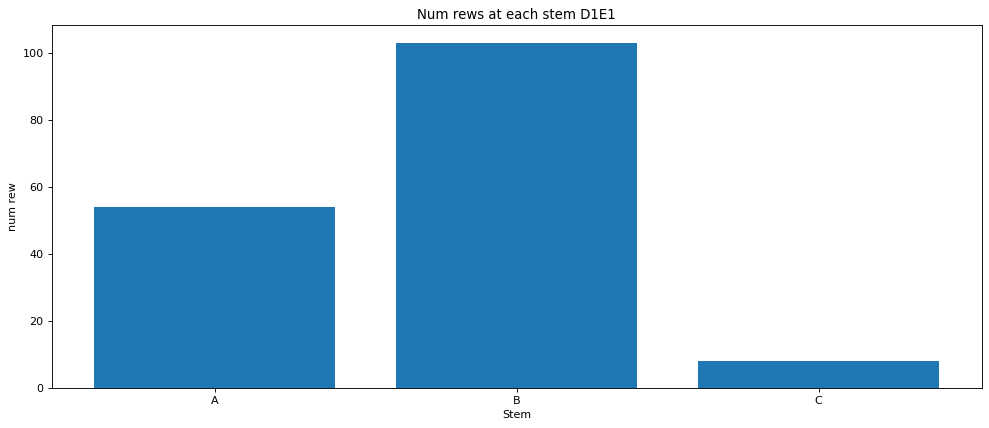

In [9]:
num_rews_A = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'A')]
num_rews_B = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'B')]
num_rews_C = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'C')]
rA = len(num_rews_A)
rB = len(num_rews_B)
rC = len(num_rews_C)
print(rA + rB + rC)

figure(figsize=(15, 6), dpi=80)
stems = ['A', 'B', 'C']
rewards = [rA, rB, rC]
plt.bar(stems, rewards)
plt.title('Num rews at each stem D1E1')
plt.xlabel('Stem')
plt.ylabel('num rew')

### Playing with for loops

In [10]:
# A = []
# B = 0
# C = 0
# for i in range(len(firstday_firstsesh)):
#     #print(df.iloc[i,0], df.iloc[i,2])
#     if firstday_firstsesh.iloc[i,2] == 'A':
#         A[] = firstday_firstsesh[i,3]
                 
#          #A = A +1          
#     if firstday_firstsesh.iloc[i,2] == 'B':
#          B = B +1  
#     if firstday_firstsesh.iloc[i,2] == 'C':
#          C = C +1        



## rew rate calculation

### rew rate all (rew) and only first part(rew_smaller) for plot


Text(0, 0.5, 'Avg Rew Rate')

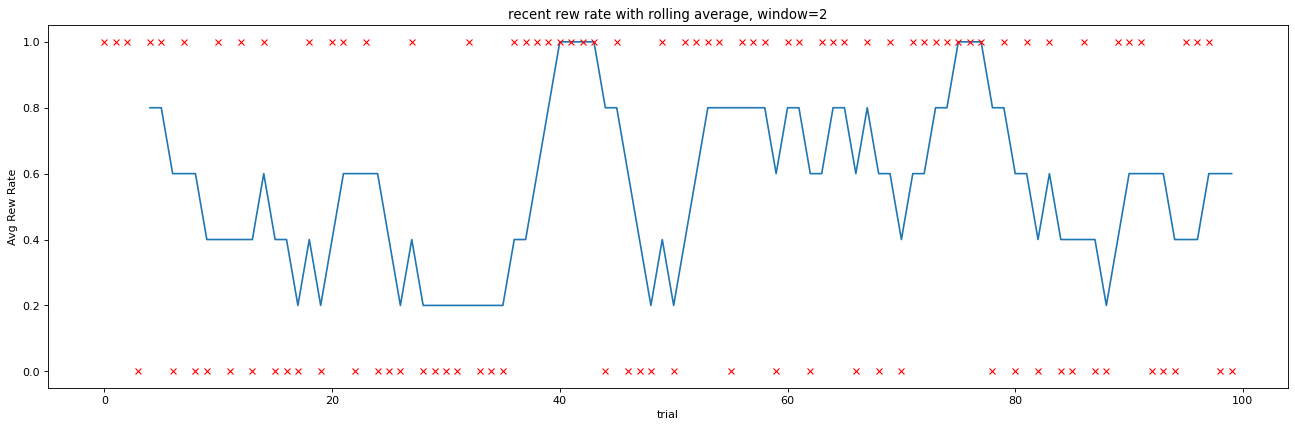

In [11]:
figure(figsize=(20, 6), dpi=80)
rew = firstday_firstsesh.iloc[ :, 3]
rew_smaller = firstday_firstsesh.iloc[ :100, 3]
#rew_all = firstday_firstsesh.iloc[]
rew_rate = rew_smaller.rolling(window=5).mean()
plt.plot(rew_rate, label = 'avg rew rate')
plt.plot(rew_smaller, 'rx', label = 'reward=binary')
plt.title("recent rew rate with rolling average, window=2")
plt.xlabel("trial")
plt.ylabel("Avg Rew Rate")


### Adding column of rew rate to firstday_firstsesh

In [12]:
rew_rate_all = rew.rolling(window=10).mean()
#rew_rate_all = pd.DataFrame(rew_rate_all)
firstday_firstsesh.loc['Rew_rate'] = rew_rate_all
firstday_firstsesh

/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0.0,4.0,B,1.0,8.050208e+11,20200213.0,1.0,0.0
1,1.0,3.0,B,1.0,8.050208e+11,20200213.0,1.0,1.0
2,2.0,1.0,A,1.0,8.050208e+11,20200213.0,1.0,2.0
3,3.0,2.0,A,0.0,8.050208e+11,20200213.0,1.0,3.0
4,4.0,1.0,A,1.0,8.050208e+11,20200213.0,1.0,4.0
...,...,...,...,...,...,...,...,...
276,276.0,3.0,B,0.0,2.050805e+11,20200213.0,1.0,276.0
277,277.0,4.0,B,0.0,2.050805e+11,20200213.0,1.0,277.0
278,278.0,3.0,B,1.0,2.050805e+11,20200213.0,1.0,278.0
279,279.0,4.0,B,0.0,2.050805e+11,20200213.0,1.0,279.0


### calculate rew rates @ each stem


/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/emonroe/miniconda2/envs/Analysis_EM/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,rew_rate_A,rew_rate_B,rew_rate_C
0,0.0,4.0,B,1.0,8.050208e+11,20200213.0,1.0,0.0,NaN,NaN,NaN
1,1.0,3.0,B,1.0,8.050208e+11,20200213.0,1.0,1.0,NaN,NaN,NaN
2,2.0,1.0,A,1.0,8.050208e+11,20200213.0,1.0,2.0,NaN,NaN,NaN
3,3.0,2.0,A,0.0,8.050208e+11,20200213.0,1.0,3.0,NaN,NaN,NaN
4,4.0,1.0,A,1.0,8.050208e+11,20200213.0,1.0,4.0,0.666667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
276,276.0,3.0,B,0.0,2.050805e+11,20200213.0,1.0,276.0,NaN,0.666667,NaN
277,277.0,4.0,B,0.0,2.050805e+11,20200213.0,1.0,277.0,NaN,0.333333,NaN
278,278.0,3.0,B,1.0,2.050805e+11,20200213.0,1.0,278.0,NaN,0.333333,NaN
279,279.0,4.0,B,0.0,2.050805e+11,20200213.0,1.0,279.0,NaN,0.333333,NaN


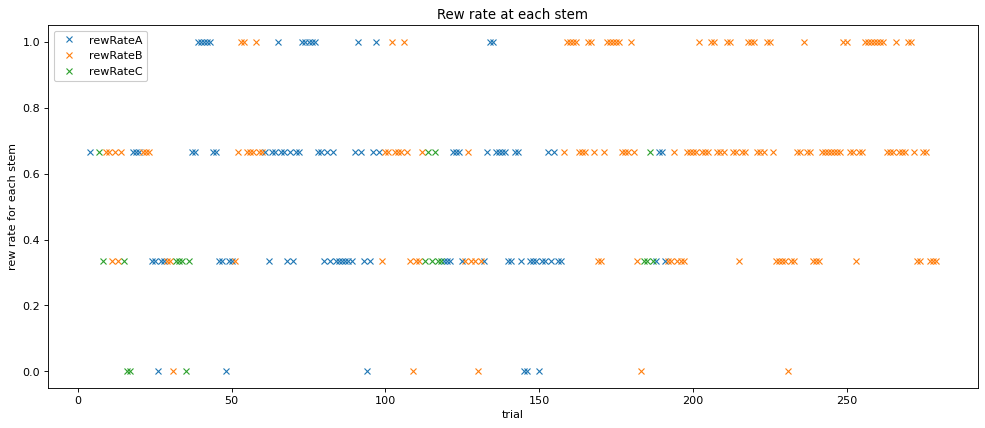

In [13]:
firstday_firstsesh.rew_rate_A = 0 #type = int now. 
firstday_firstsesh.rew_rate_B = 0
firstday_firstsesh.rew_rate_C = 0



rewA = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='A']['reward']
rew_rateA = rewA.rolling(window=3).mean()
firstday_firstsesh.loc[firstday_firstsesh.stem =='A', 'rew_rate_A'] = rew_rateA
rewB = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='B']['reward']
rew_rateB = rewB.rolling(window=3).mean()
firstday_firstsesh.loc[firstday_firstsesh.stem =='B', 'rew_rate_B'] = rew_rateB
rewC = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='C']['reward']
rew_rateC = rewC.rolling(window=3).mean()
firstday_firstsesh.loc[firstday_firstsesh.stem =='C', 'rew_rate_C'] = rew_rateC

figure(figsize=(15, 6), dpi=80)
#Plotting each of these overlayed which looks awful i know, thinking about a more relevent way to visualize 
plt.plot(rew_rateA, 'x', label = "rewRateA")
plt.plot(rew_rateB, 'x', label = "rewRateB")
plt.plot(rew_rateC, 'x', label = "rewRateC")


plt.title('Rew rate at each stem')
plt.xlabel('trial')
plt.ylabel('rew rate for each stem')
plt.legend(framealpha=1, frameon=True)

firstday_firstsesh

## Splitting up contingenices, finding most rewarded

In [182]:
c1 = firstday_firstsesh[(firstday_firstsesh['contingency'] == 805020802050)]
c2 = firstday_firstsesh[(firstday_firstsesh['contingency'] == 205080508020)]

#finding number of rewards at each leaf
rew1 = len(c1.loc[(c1['leaf'] == 1) & c1['reward'] == 1])
rew2 = len(c1.loc[(c1['leaf'] == 2) & c1['reward'] == 1])
rew3 = len(c1.loc[(c1['leaf'] == 3) & c1['reward'] == 1])
rew4 = len(c1.loc[(c1['leaf'] == 4) & c1['reward'] == 1])
rew5 = len(c1.loc[(c1['leaf'] == 5) & c1['reward'] == 1])
rew6 = len(c1.loc[(c1['leaf'] == 6) & c1['reward'] == 1])



#printing this out nicely
print("the number of rewards at leaf 1 in c1 is %d"  % rew1)
print("the number of rewards at leaf 2 is %d"  % rew2)
print("the number of rewards at leaf 3 is %d"  % rew3)
print("the number of rewards at leaf 4 is %d"  % rew4)
print("the number of rewards at leaf 5 is %d"  % rew5)
print("the number of rewards at leaf 6 is %d"  % rew6)

the number of rewards at leaf 1 in c1 is 30
the number of rewards at leaf 2 is 16
the number of rewards at leaf 3 is 6
the number of rewards at leaf 4 is 19
the number of rewards at leaf 5 is 0
the number of rewards at leaf 6 is 6


### splitting up the contingency from the df into leaf probs

In [16]:
c1_int = firstday_firstsesh.contingency[1]
l1_probs = int(str(c1_int)[:2])
l2_probs = int(str(c1_int)[2:4])
l3_probs = int(str(c1_int)[4:6])
l4_probs = int(str(c1_int)[6:8])
l5_probs = int(str(c1_int)[8:10])
l6_probs = int(str(c1_int)[10:12])

all_probs = (l1_probs, l2_probs, l3_probs, l4_probs, l5_probs, l6_probs)

print(all_probs)

(80, 50, 20, 80, 20, 50)


In [17]:
visits_1_c1 = len(c1.loc[(c1['leaf'] == 1)])
visits_2_c1 = len(c1.loc[(c1['leaf'] == 2)])
visits_3_c1 = len(c1.loc[(c1['leaf'] == 3)])
visits_4_c1 = len(c1.loc[(c1['leaf'] == 4)])
visits_5_c1 = len(c1.loc[(c1['leaf'] == 5)])
visits_6_c1 = len(c1.loc[(c1['leaf'] == 6)])

all_visits= (visits_1_c1, visits_2_c1, visits_3_c1, visits_4_c1, visits_5_c1, visits_6_c1)

all_visits


(38, 40, 22, 22, 8, 10)

In [18]:
#how does the recent reward rate (predict, relate to) the number of recent visits to each stem? 
#what i wanted to do was compare the number of rewards to the number of visits at each stem, need to keep the pairs but also want to sort them? 

Text(0, 0.5, 'number of visits')

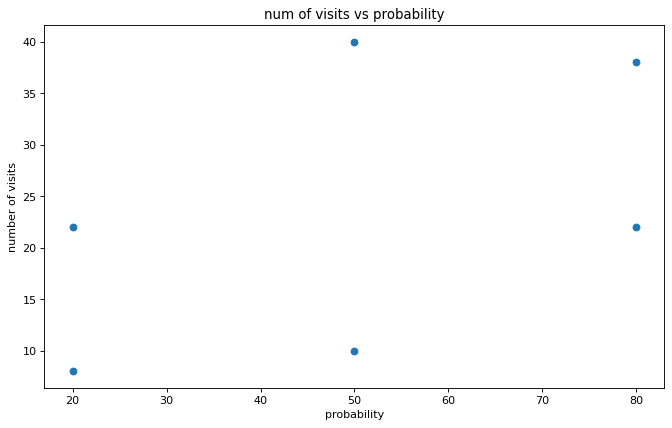

In [19]:
figure(figsize=(10, 6), dpi=80)
plt.scatter(all_probs, all_visits) #actually didnt need to sort, it was just weird looking but makes sense.
plt.title('num of visits vs probability')
plt.xlabel('probability')
plt.ylabel('number of visits') #maybe color coating dots per stem would be helpful? 


Text(0, 0.5, '')

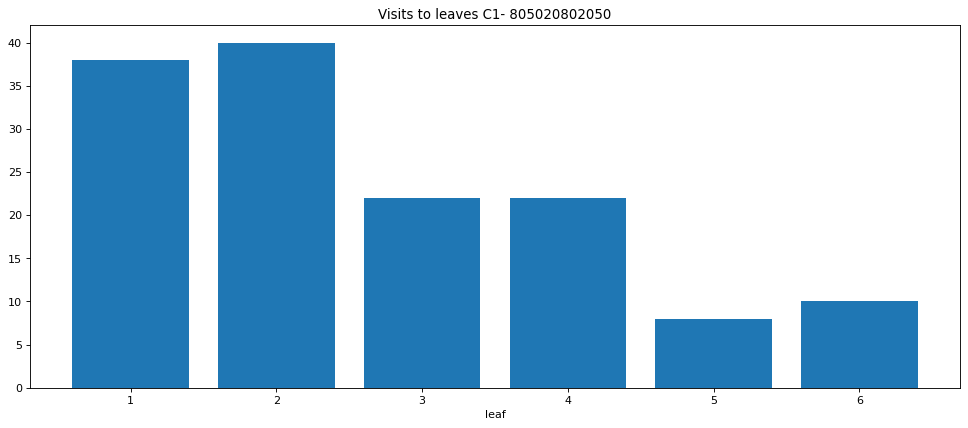

In [20]:
figure(figsize=(15, 6), dpi=80)


leaves = [1,2,3,4,5,6]
plt.bar(leaves, all_visits)
plt.title('Visits to leaves C1- %d' % c1_int) 
plt.xlabel('leaf')
plt.ylabel('')

In [183]:
len(c2)

140

In [178]:
#now i should find the proprtion of time he spends at each stem for some parameter 
#set proportions worth of time. 

#So ill need to 
#get 1st ___ of visits to A, B, and C 
#hard code: number of trials in contingency 
#parameter to play with- number of trials in window

# proportion = number of visits @ stem/ number of visits in window? 

#so will have to find number of trials in window that i want to play with, 

num_trials_in_conting = 140 
group_size = 10
num_iter = int(num_trials_in_conting / group_size)

#first break up c1 into groups of size of window size 
lst = (np.array_split(c1, num_iter))

#for ix in range(len((lst)))
window1 = lst[0]

lstAll = []

for ix in range(num_iter):
    window = lst[ix]
    for stem in ['A', 'B', 'C']:
        prop = sum(window['stem'] == stem)/ (group_size)
        lstAll.append(prop)
        print(prop)
        
lstA=lstAll[0::3]
lstB=lstAll[1::3]
lstC=lstAll[2::3]
    
lstA



0.3
0.3
0.4
0.2
0.5
0.3
0.6
0.4
0.0
0.3
0.2
0.5
1.0
0.0
0.0
0.1
0.9
0.0
0.9
0.1
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.9
0.1
0.0
0.0
1.0
0.0
0.1
0.3
0.6
0.6
0.4
0.0
0.8
0.2
0.0


[0.3, 0.2, 0.6, 0.3, 1.0, 0.1, 0.9, 1.0, 1.0, 0.9, 0.0, 0.1, 0.6, 0.8]

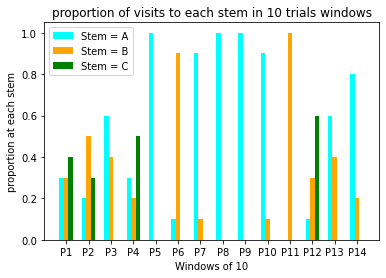

In [180]:
x = np.arange(14)
y1 = lstA
y2 = lstB
y3 = lstC
width = 0.2
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14'])
plt.xlabel("Windows of 10")
plt.ylabel("proportion at each stem")
plt.legend(["Stem = A", "Stem = B", "Stem = C"])
plt.title('proportion of visits to each stem in 10 trials windows')
plt.show()

In [67]:
# Now I'd like to do the same thing for C2 to compare how his visits change 

120

In [191]:

num_trials_in_conting = 140 
group_size = 20
num_iter = int(num_trials_in_conting / group_size)

lst2 = (np.array_split(c2, num_iter))

lstAll2 = []

for ix in range(num_iter):
    window = lst2[ix]
    for stem in ['A', 'B', 'C']:
        prop = sum(window['stem'] == stem)/ (group_size)
        lstAll2.append(prop)
        print(prop)
        
lstA2=lstAll2[0::3]
lstB2=lstAll2[1::3]
lstC2=lstAll2[2::3]
    
# # lstA2
# lst2
# #lstAll2

0.9
0.1
0.0
0.0
1.0
0.0
0.2
0.6
0.2
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0


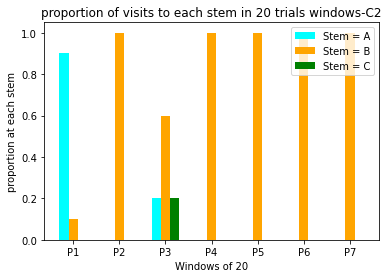

In [195]:
x = np.arange(7)
y1 = lstA2
y2 = lstB2
y3 = lstC2
width = 0.2
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'])
plt.xlabel("Windows of 20")
plt.ylabel("proportion at each stem")
plt.legend(["Stem = A", "Stem = B", "Stem = C"])
plt.title('proportion of visits to each stem in 20 trials windows-C2')
plt.show()
#, 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14'

In [196]:
#This is just to show that there was not an error with the last plot, and that the rat spent the most time at B for sure. 

visits_1_c2 = len(c2.loc[(c2['leaf'] == 1)])
visits_2_c2 = len(c2.loc[(c2['leaf'] == 2)])
visits_3_c2 = len(c2.loc[(c2['leaf'] == 3)])
visits_4_c2 = len(c2.loc[(c2['leaf'] == 4)])
visits_5_c2 = len(c2.loc[(c2['leaf'] == 5)])
visits_6_c2 = len(c2.loc[(c2['leaf'] == 6)])

all_visits= (visits_1_c2, visits_2_c2, visits_3_c2, visits_4_c2, visits_5_c2, visits_6_c2)

all_visists 



140

In [210]:
# So now i'd loike to look at exploration strategy. 
# The idea is that over time, the rat may learn to find which is the best stem.
#So in the first conting., he may spend more time(trials) at all three stems. A-B-C-A-B-C for much longer.(no biases) 
# But maybe by, c10, lets say, He may only go A-B-C, determine that B is the best, 
#and then stay there much sooner. 
#another thing to consider here is the number of visits to the leaves within a bout a stem visit. 
#This probably also changes with exploration strategy. 

# I dont want to set an arbitrary cutoff for when exploration steop and exploitation starts. 
# I basically want to find the point when the animal spends the most time at whichever stem he spends 
# the most time at for that contingency (not necessarily the best). 


# I think I good to start with this would not be the first contingency of the first day. 
#SO where I will start off will be on... day 8 completely random. Session 2- so had some 
#experience that day but still motivated.


day8_epoch2 =  df[(df['date'] == 20200221) & (df['session'] == 2)]

#hmmm okay so i plotted first only the first contingency and he spent the most time at C, even though 
#A was technically better. so i figured I would find an example where he spent the most time at the 
#best, tried plotting c2 of the same session and WOW he spent the entire time at B. not interesting and also 
#not the best stem! what the heck chimi? 
#Ill try day 5 out of curiousity and also randomness?


Text(0, 0.5, 'leaf visited')

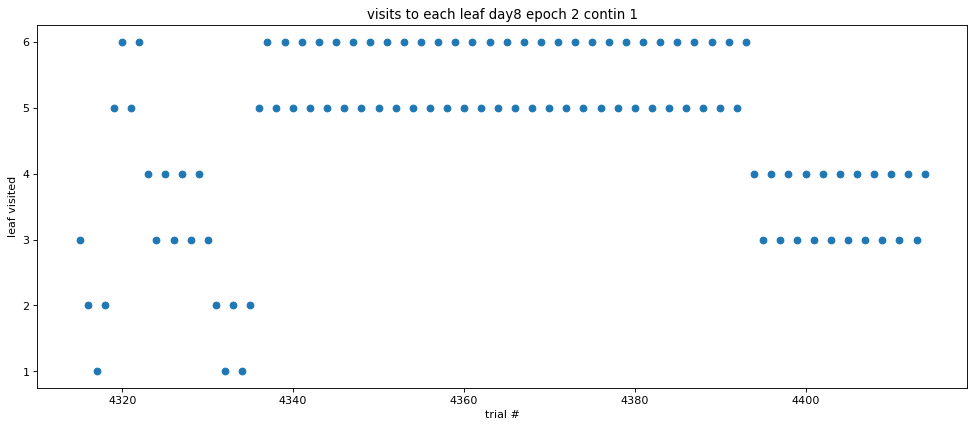

In [225]:
day8_epoch2
d8_s2_c1 = day8_epoch2[(day8_epoch2['contingency'] == 508050502080)]

figure(figsize=(15, 6), dpi=80)
plt.scatter(d8_s2_c1[d8_s2_c1.columns[0]], d8_s2_c1[d8_s2_c1.columns[1]])
plt.title("visits to each leaf day8 epoch 2 contin 1")
plt.xlabel("trial #")
plt.ylabel("leaf visited")

Text(0, 0.5, 'leaf visited')

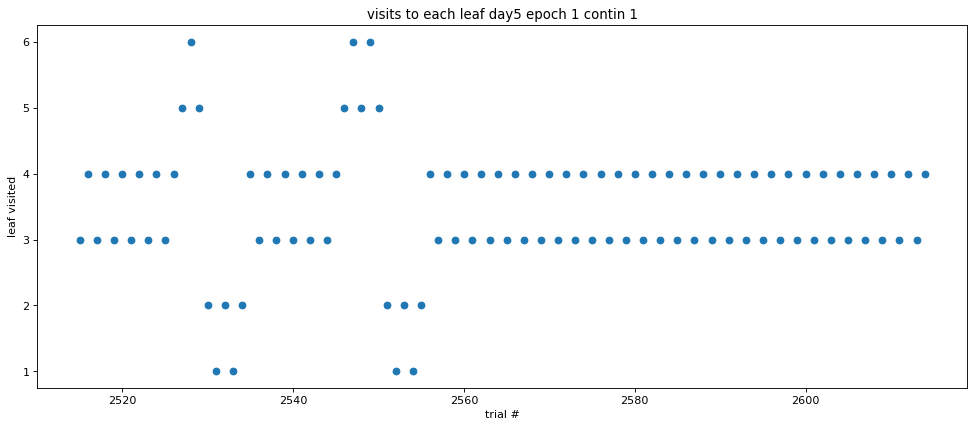

In [229]:
#So now I have made a prediction that first ~20 trials are exploration. Lets confirm with another day. 
day5_epoch1 =  df[(df['date'] == 20200218) & (df['session'] == 1)]
day5_epoch1
d5_s1_c1 = day5_epoch1[(day5_epoch1['contingency'] == 502050805050)]
d5_s1_c1

figure(figsize=(15, 6), dpi=80)
plt.scatter(d5_s1_c1[d5_s1_c1.columns[0]], d5_s1_c1[d5_s1_c1.columns[1]])
plt.title("visits to each leaf day5 epoch 1 contin 1")
plt.xlabel("trial #")
plt.ylabel("leaf visited")


Text(0, 0.5, 'leaf visited')

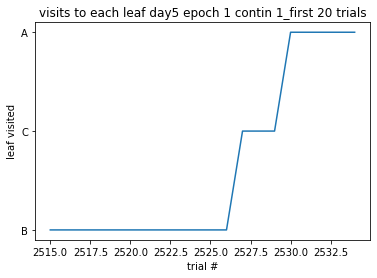

In [244]:
# hmmm interesting. I can see why "noise" is an issue here. his behavior depends on the contingencies as well. 

#could split it up by contingency type. 
# eg how does he explore every time there is an 8050 and an 8020? 

#Sooooo lets just call our trials of interest the first 20 trials. 
#Id like to know which stems he visits in order in the first 20 trials. 

#lets start with day5, session1, conting 1. 

d5_s1_c1_1st20 = d5_s1_c1[(d5_s1_c1['trial'] <20)]['stem']
#type(d5_s1_c1_1st20)
plt.plot(d5_s1_c1_1st20)
plt.title("visits to each leaf day5 epoch 1 contin 1_first 20 trials")
plt.xlabel("trial #")
plt.ylabel("leaf visited")



In [257]:
#Okay so after this work and a little thinking, I decided it would be easier to just start
#out by looking at the order of the first 3 stems the guy visits and see if theres a pattern. 
#The options: ABC, BCA, CAB, BAC, CBA, ACB, and then the option that he goes back to the first stem for
#the third choice. Oy lots of choices. 

#Will only look at the first contginecy of each session. 

#In the end, I think I want a bar plot of number of times he did each choice. 

#So, second to last, I want to end up with 2 lists. One will contain the choices listed above for stem order. 
#The second will be the number of times each choice was done. 

#If the data starts with 202002
#for every day, for every session, ugh for every contingency which is not easy to check as it is right now, fixing that first.
#Date = 20200213

#okay ugh maybe i dont need to know contingency because I will only look at first 3 visits of every unique session



#Date = 20200213

#Largest= date
#then session 
#then stem. 
#Will say to look at first row and find stem. stemm = that.  Then keep going until stem != that. stem2 is now
#equal to new stem. then keep going until stem equals something new. thats stem3. Then log that somehow? 
#likely a bunch of if statements...

#session = 1

#stem1= df[(df['date'] == Date) & (df['session'] == session) & (df['trial'] == 0)]['stem']


    
#possible irrelevant? 

#opperationalizing variables


0    B
Name: stem, dtype: object

In [290]:
#I want to add a column to df that says what contingency it is. 
#Irrelevant ignore
#cont = df[(df['date'] ==20200213) & (df['session'] == 1)]['contingency']


df


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,stemChange
0,0,4,B,1,805020802050,20200213,1,0,False
1,1,3,B,1,805020802050,20200213,1,1,False
2,2,1,A,1,805020802050,20200213,1,2,True
3,3,2,A,0,805020802050,20200213,1,3,False
4,4,1,A,1,805020802050,20200213,1,4,False
...,...,...,...,...,...,...,...,...,...
10110,10110,3,B,0,508050208020,20200228,3,195,False
10111,10111,4,B,0,508050208020,20200228,3,196,False
10112,10112,3,B,1,508050208020,20200228,3,197,False
10113,10113,4,B,0,508050208020,20200228,3,198,False


In [297]:
#Niiiiiice this just checks if the stem has changes and adds true or false to df.
df["stemChange"] = df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"] #better way to calc?
df["sessionChange"] = df['session'].diff()
df["dateChange"] = df['date'].diff()


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,stemChange,sessionChange,dateChange
1,1,3,B,1,805020802050,20200213,1,1,False,0.0,0.0
2,2,1,A,1,805020802050,20200213,1,2,True,0.0,0.0
3,3,2,A,0,805020802050,20200213,1,3,False,0.0,0.0
4,4,1,A,1,805020802050,20200213,1,4,False,0.0,0.0
5,5,6,C,1,805020802050,20200213,1,5,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
276,276,3,B,0,205080508020,20200213,1,276,False,0.0,0.0
277,277,4,B,0,205080508020,20200213,1,277,False,0.0,0.0
278,278,3,B,1,205080508020,20200213,1,278,False,0.0,0.0
279,279,4,B,0,205080508020,20200213,1,279,False,0.0,0.0


Text(0, 0.5, 'num times start session at stem')

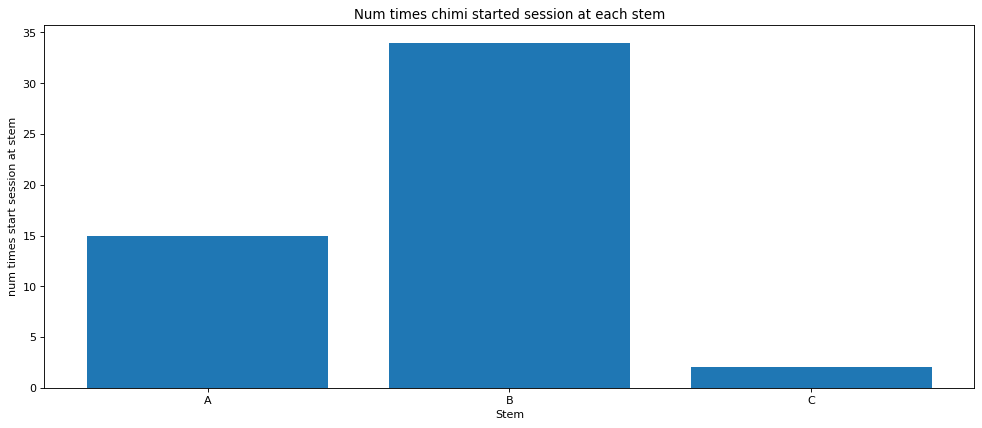

In [352]:
#First lets use the new columns to find the first stem of every session. 
session_check = df[(df['sessionChange'] != 0) | (df['dateChange'] != 0)]
session_check
first_trials= df[(df['trial'] == 0)]['stem']
#type(first_trials)
first_A = (first_trials.where(first_trials == 'A'))
first_B =(first_trials.where(first_trials == 'B'))
first_C =(first_trials.where(first_trials == 'C'))
first_A=first_A.count()
first_B=first_B.count()
first_C=first_C.count()
#print(first_A, first_B, first_C)

figure(figsize=(15, 6), dpi=80)
stems = ['A', 'B', 'C']
start = [first_A, first_B, first_C]
plt.bar(stems, start)
plt.title('Num times chimi started session at each stem')
plt.xlabel('Stem')
plt.ylabel('num times start session at stem')


In [517]:
# I need to use the indexes of session check, which tell me the first time theres a new session
#Split the data up- between the two indexes of session check, find the times when stem change is true,
#find the first two stems. 

#first, find df when index = first index of session_check

for ix in range(len(session_check)):
    trial0_ix= session_check.iloc[ix, 0]
    trial0_df = df.iloc[trial0_ix]
    stem1=trial0_df.loc['stem']
    trial0_ix_next= session_check.iloc[(ix+1), 0]
    trial0_ix_next
    if ix ==0:
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
    else: 
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
        current_df = current_df.where(current_df.iloc[:,0] > trial0_ix)
    current_df
    stem_order_df = current_df[(current_df['stemChange'] == 1.0)]['stem']
    stem_order_df
    ser_first2= stem_order_df.head(2)
    stem2=ser_first2.head(1)
    #stem2
    stem3 = ser_first2[-1:]
    #stem3
    if ix == 0:
        stems = []
    stems.append(stem1)
    stem2=stem2.tolist()
    stem3=stem3.tolist()
    stems.append(stem2)
    stems.append(stem3)
stems
# will throw error because cant handle # 51 with the qay ive written it. 

IndexError: single positional indexer is out-of-bounds

In [518]:
#If the trial is 0, stem 1= that stem. 
#stem 2 is the next true. stem 3 is the next true. 

#firstday_firstsesh.loc["stemChange"] = firstday_firstsesh["stem"].shift(1, fill_value=firstday_firstsesh["stem"].head(1)) != firstday_firstsesh["stem"]
#firstday_firstsesh

# first_month = df[(df['date'] <= 20200229)]
# Date = 20200213
# Session = 1

# for Date, Session in range(len(first_month)): 
#     working = first_month[(first_month['date'] == Date) & (first_month['session'] = Session)]['stem']
#     Date = Date +1
#     Session = Session+1
    
# for session in range(1:3):
final = [stems[i * 3:(i + 1) * 3] for i in range((len(stems) + 3 - 1) // 3 )] 
print (type(final))

ACB=0
ABC=0
CBA=0
CAB=0
BAC=0
BCA=0
CAC=0
BAB=0
CBC=0
BCB=0
ABA=0
ACA=0



for list_ix in range(len(final)):
    if final[list_ix] == ['A', ['C'], ['B']]:
        ACB = ACB + 1 
    elif final[list_ix] == ['A', ['B'], ['C']]:
        ABC = ABC + 1 
    elif final[list_ix] == ['C', ['B'], ['A']]:
        CBA = CBA + 1 
    elif final[list_ix] == ['C', ['A'], ['B']]:
        CAB = CAB + 1  
    elif final[list_ix] == ['B', ['A'], ['C']]:
        BAC = BAC + 1  
    elif final[list_ix] == ['B', ['C'], ['A']]:
         BCA = BCA + 1
    elif final[list_ix] == ['C', ['A'], ['C']]:
        CAC = CAC + 1      
    elif final[list_ix] == ['B', ['A'], ['B']]:
        BAB = BAB + 1
    elif final[list_ix] == ['C', ['B'], ['C']]:
        CBC = CBC + 1
    elif final[list_ix] == ['B', ['C'], ['B']]:
        BCB = BCB + 1      
    elif final[list_ix] == ['A', ['B'], ['A']]:
        ABA = ABA + 1
    elif final[list_ix] == ['A', ['C'], ['A']]:
        ACA = ACA+1

list_of_3s = (ACB,ABC,CBA,CAB,BAC,BCA,CAC,BAB,CBC,BCB,ABA,ACA)
list_of_3s

<class 'list'>


(11, 4, 2, 0, 20, 12, 0, 0, 0, 1, 0, 0)

Text(0, 0.5, 'num times start session at stem group')

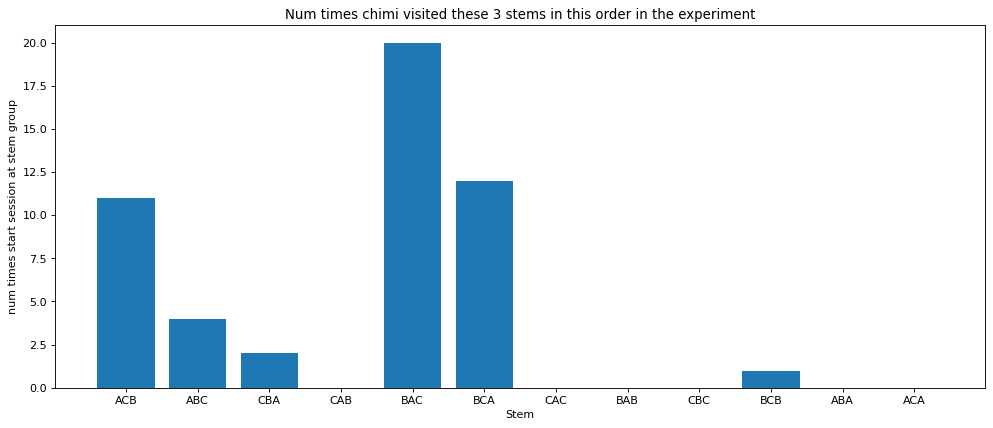

In [519]:
figure(figsize=(15, 6), dpi=80)
stems = ['ACB','ABC','CBA','CAB','BAC','BCA','CAC','BAB','CBC','BCB','ABA','ACA']
plt.bar(stems, list_of_3s)
plt.title('Num times chimi visited these 3 stems in this order in the experiment')
plt.xlabel('Stem')
plt.ylabel('num times start session at stem group')



In [379]:
#could look at how this pattern develops

2       A
5       C
9       B
15      C
18      A
       ..
9935    B
9939    A
9954    C
9961    A
9985    B
Name: stem, Length: 440, dtype: object

TypeError: cannot unpack non-iterable int object

In [ ]:
# from conversatino with Alison: 

#What im working on now is good, we dont know this information. 
# Better way to do it is to take differences among date and session like I did with stem change. Then should be able to add or subtract those (in case theres a day with only 1 session)
#But, should go back to original question 
#does it matter what order the rat goes in to start? Or is it just that he goes to each of them a certain number of time? 
#defining exploration vs exploitation in some way? 
#go back to the larger question and ask how does what Im asking now help me answer the bigger question>? does it really tell me what I need to know to answer the bigger question? 
#thinking about it in terms of biases is interesting too (at first he has no bias, spends equal amount of time at all of them)
#figure out the question im trying to ask and pseudocode it, talk with alison before trying it out 
#just for notes we also talked about when to start separat


In [487]:
#want to write session_check to csv so I have better intuition looking through it. 
# current_df.to_csv(r'/home/emonroe/Documents/current_df.csv', index = False)

In [549]:
# what id like to do now is see how many rewards the guy gets in every contingency of every run. 
# i predict that he will get more as he gets better at the task. Then i can investigate what strategies lead to higher rew

# counting rewards in 

for ix in range(len(session_check)):
    trial0_ix= session_check.iloc[ix, 0]
    trial0_ix
    trial0_df = df.iloc[trial0_ix]
    trial0_df
    stem1=trial0_df.loc['stem']
    trial0_ix_next= session_check.iloc[(ix+1), 0]
    trial0_ix_next
#     trial0_ix_next
    if ix ==0:
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
    else: 
        current_df = df.where(df.iloc[:,0] < trial0_ix_next)
        current_df = current_df.where(current_df.iloc[:,0] > trial0_ix)
    current_df
    rewards = (current_df['reward'])
    rewards = rewards.dropna()
    rewards = rewards.sum()
    rewards
    if ix == 0:
         track_rewards = []
    track_rewards.append(rewards)
    
track_rewards

IndexError: single positional indexer is out-of-bounds

Text(0, 0.5, 'num rew total')

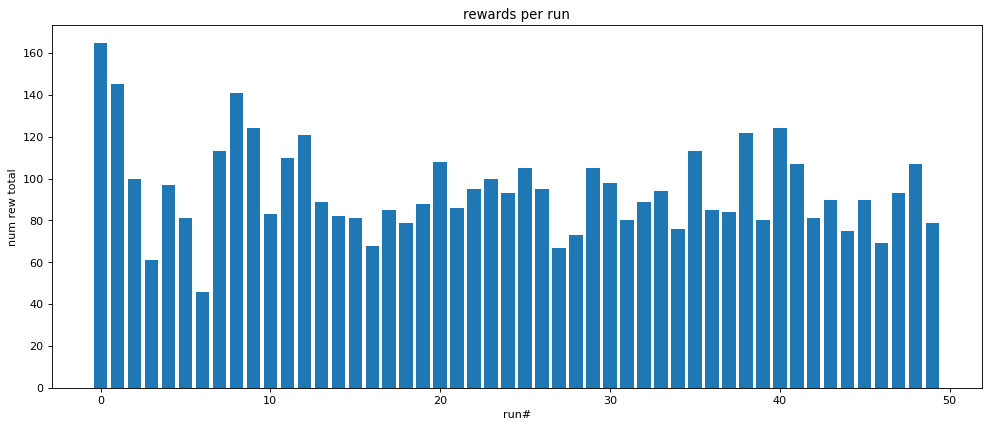

In [559]:
track_rewards
figure(figsize=(15, 6), dpi=80)
sessions= range(len(track_rewards))
plt.bar(sessions, track_rewards)
plt.title('rewards per run')
plt.xlabel('run#')
plt.ylabel('num rew total')




In [560]:
# I would like to replicate Alisons plots. But instead of looking at it on a daily basis 
 #which i find to be too overwhleming and not helpful in understanding how he finds the best,
# id like to see it on a session by session basis. 
# first, id like to plot just rewarded vs unrewarded trials.. 
firstday_firstsesh 

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,rew_rate_A,rew_rate_B,rew_rate_C,stemChange
0,0.0,4.0,B,1.0,8.050208e+11,20200213.0,1.0,0.0,NaN,NaN,NaN,0.0
1,1.0,3.0,B,1.0,8.050208e+11,20200213.0,1.0,1.0,NaN,NaN,NaN,0.0
2,2.0,1.0,A,1.0,8.050208e+11,20200213.0,1.0,2.0,NaN,NaN,NaN,1.0
3,3.0,2.0,A,0.0,8.050208e+11,20200213.0,1.0,3.0,NaN,NaN,NaN,0.0
4,4.0,1.0,A,1.0,8.050208e+11,20200213.0,1.0,4.0,0.666667,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
277,277.0,4.0,B,0.0,2.050805e+11,20200213.0,1.0,277.0,NaN,0.333333,NaN,0.0
278,278.0,3.0,B,1.0,2.050805e+11,20200213.0,1.0,278.0,NaN,0.333333,NaN,0.0
279,279.0,4.0,B,0.0,2.050805e+11,20200213.0,1.0,279.0,NaN,0.333333,NaN,0.0
Rew_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
#something else id like to look at later is how many non rew trials it takes for him to leave. 